In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams['figure.dpi'] = 200

In [2]:
data = pd.read_csv('data/iris.data',header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [5]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(gnb.score(X_test, y_test))

3
0.96


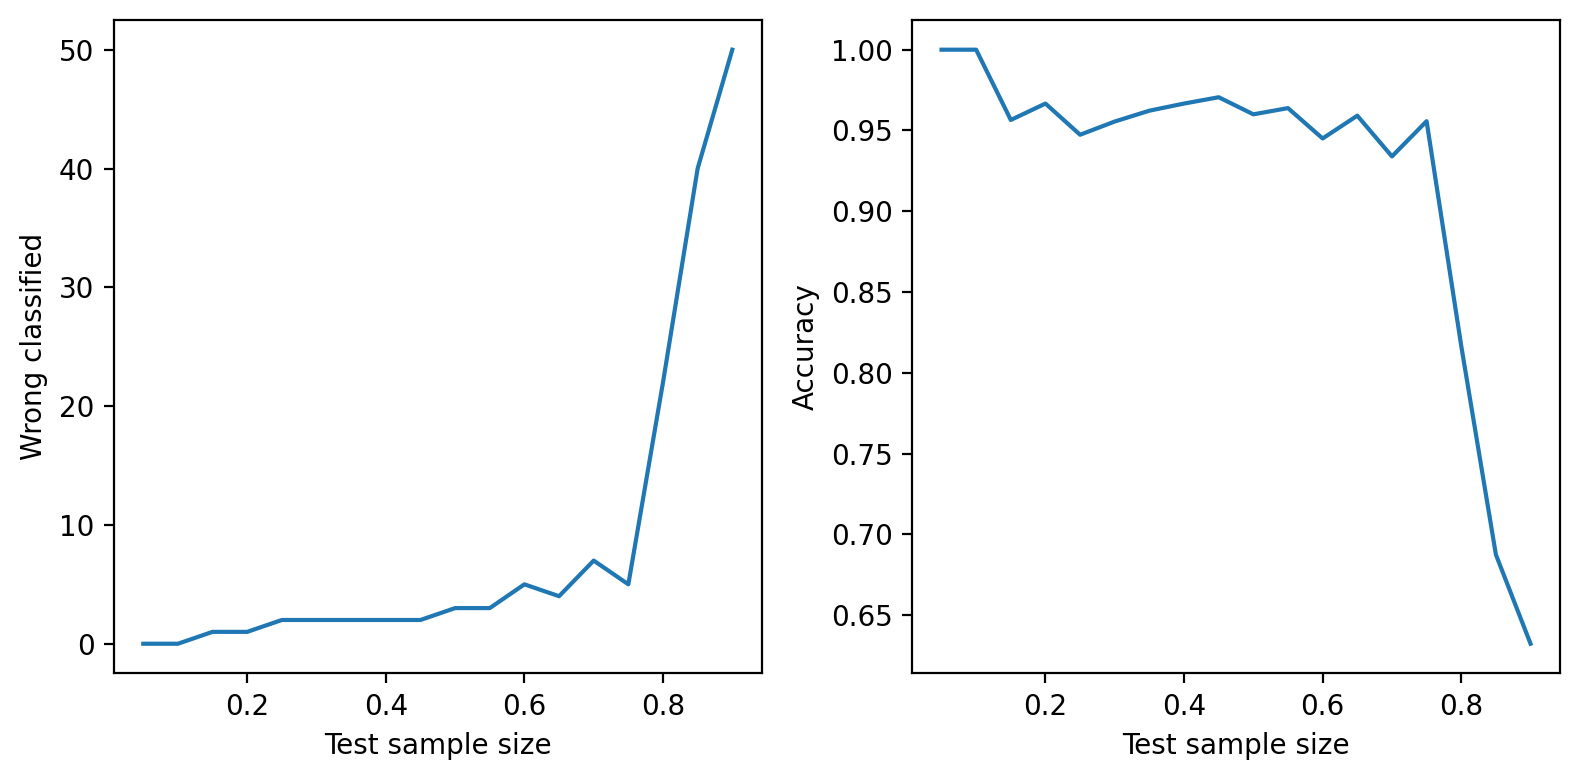

In [19]:
test_sizes = np.arange(0.05, 0.95, 0.05)
wrong_results = []
accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630415)
    clf = GaussianNB()
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(test_sizes, wrong_results)
axs[1].plot(test_sizes, accuracies)
axs[0].set_xlabel("Test sample size")
axs[0].set_ylabel("Wrong classified")
axs[1].set_xlabel("Test sample size")
axs[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [26]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

for clf in [gnb, mnb, cnb, bnb]:
    test_sizes = np.arange(0.1, 0.95, 0.05)
    wrong_results = []
    accuracies = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size) #, random_state=42)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        wrong_results.append((y_test != y_pred).sum())
        accuracies.append(clf.score(X_test, y_test))
    
    max_acc_index = accuracies.index(np.max(accuracies))
    print(test_sizes[max_acc_index])
    print(wrong_results[max_acc_index])
    print(np.max(accuracies))

0.1
0
1.0
0.40000000000000013
1
0.9836065573770492
0.9000000000000002
26
0.8088235294117647
0.6000000000000002
61
0.32967032967032966


In [30]:
tr_clf = tree.DecisionTreeClassifier()

y_pred = tr_clf.fit(X_train, y_train).predict(X_test)
print('Wrong classified: ', (y_test != y_pred).sum())
print('Score: ', tr_clf.score(X_test, y_test))
print('Num of leaves: ', tr_clf.get_n_leaves())
print('Depth: ', tr_clf.get_depth())

Wrong classified:  4
Score:  0.9466666666666667
Num of leaves:  8
Depth:  5


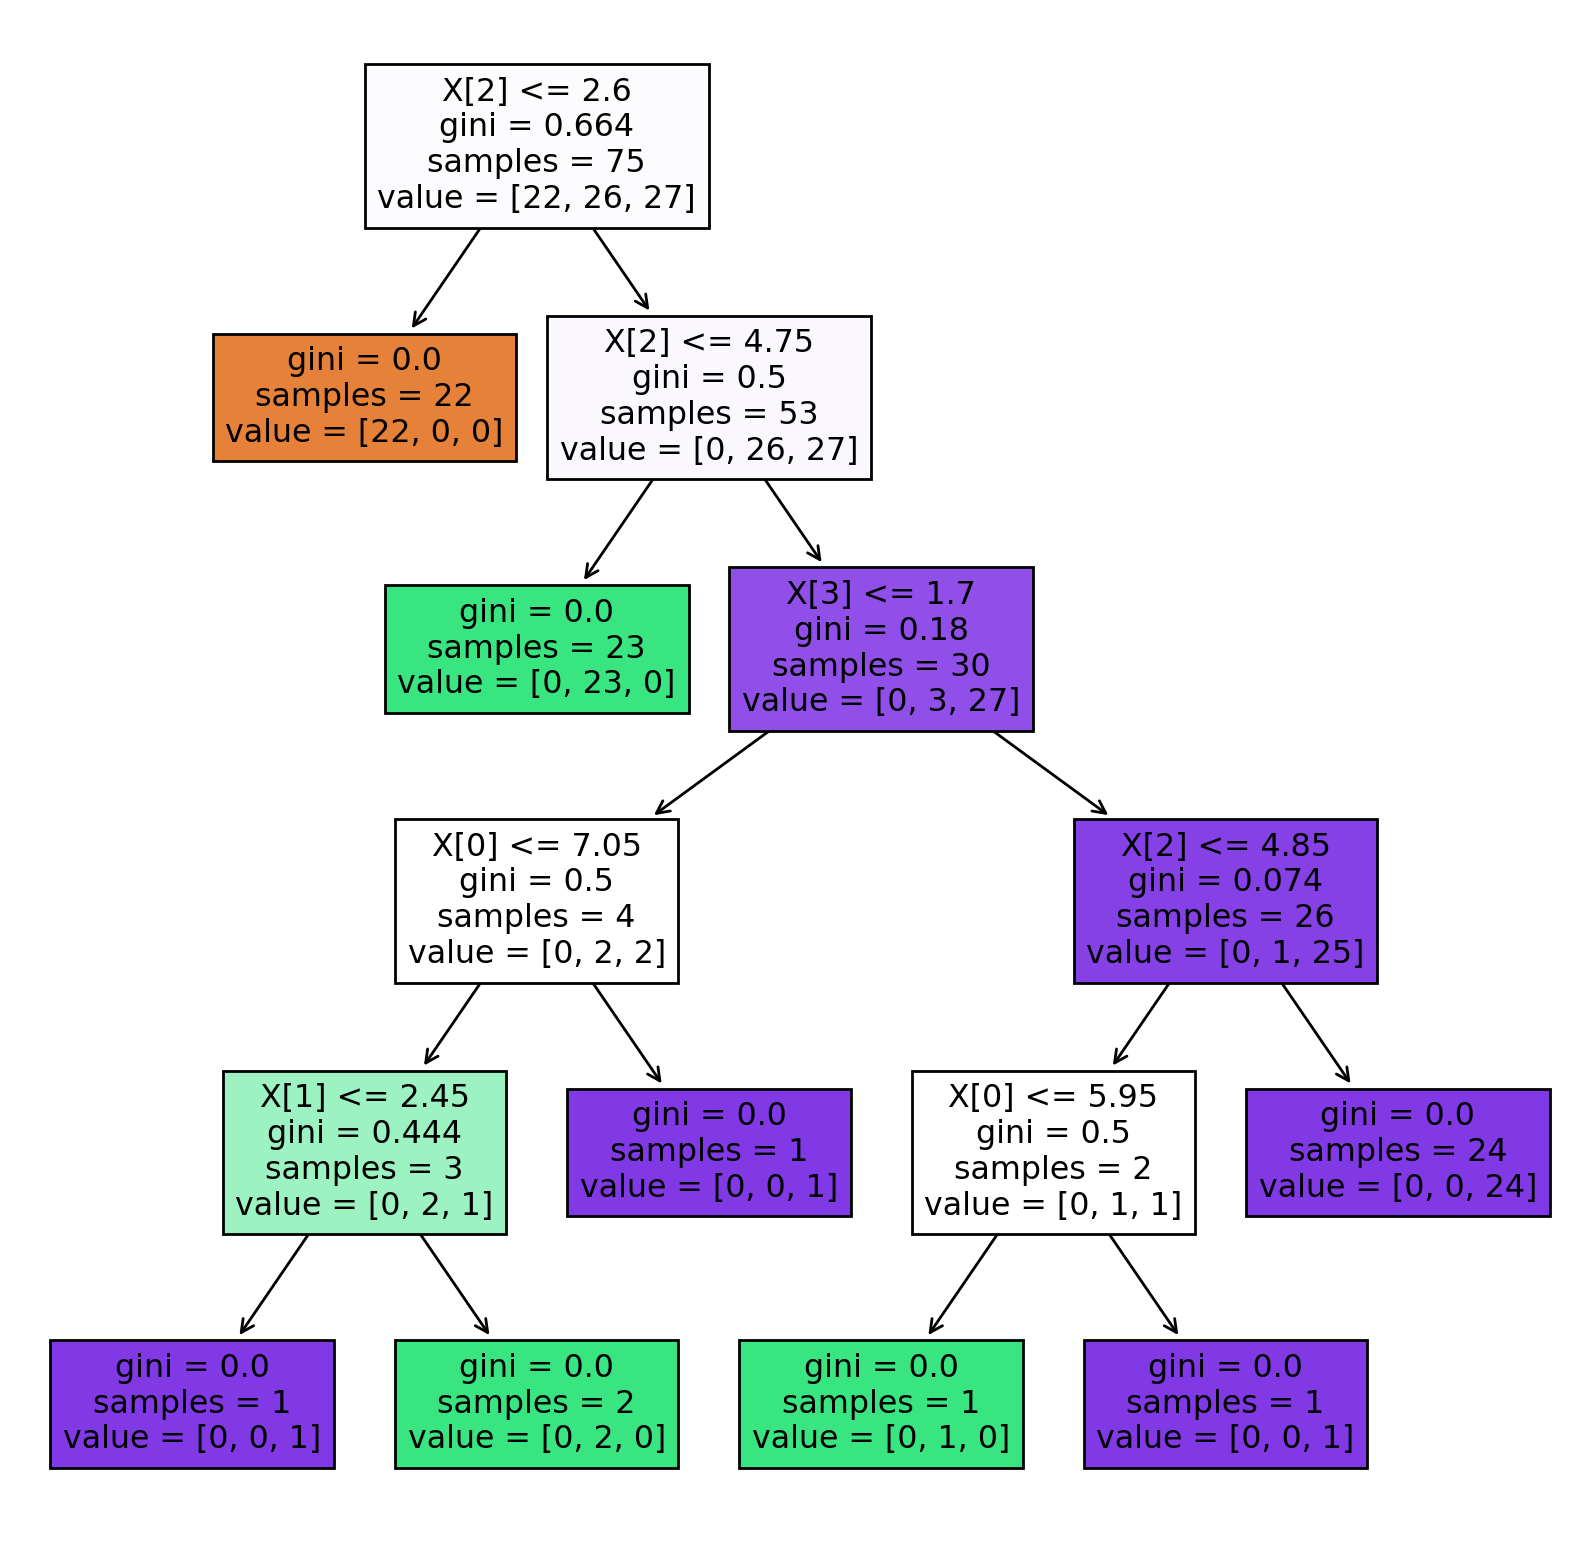

In [31]:
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(tr_clf, filled = True)
plt.show()

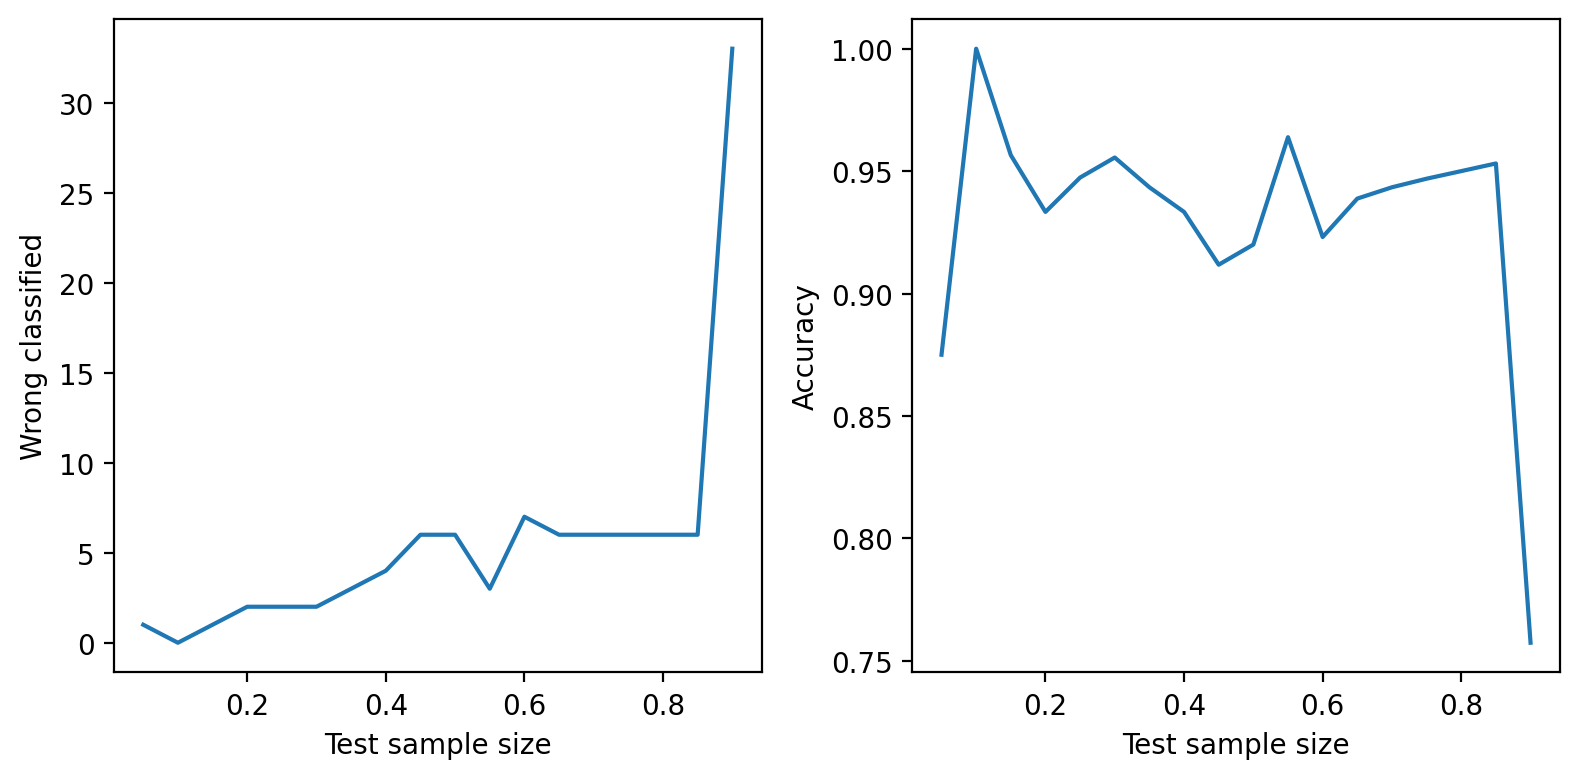

In [33]:
test_sizes = np.arange(0.05, 0.95, 0.05)
wrong_results = []
accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    clf = tree.DecisionTreeClassifier()
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(test_sizes, wrong_results)
axs[1].plot(test_sizes, accuracies)
axs[0].set_xlabel("Test sample size")
axs[0].set_ylabel("Wrong classified")
axs[1].set_xlabel("Test sample size")
axs[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [34]:
def plot_tree_accuracy(x_axis, accuracy, wrong_clfd, x_label):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(x_axis, wrong_clfd)
    axs[1].plot(x_axis, accuracy)
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel("Wrong classified")
    axs[1].set_xlabel(x_label)
    axs[1].set_ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

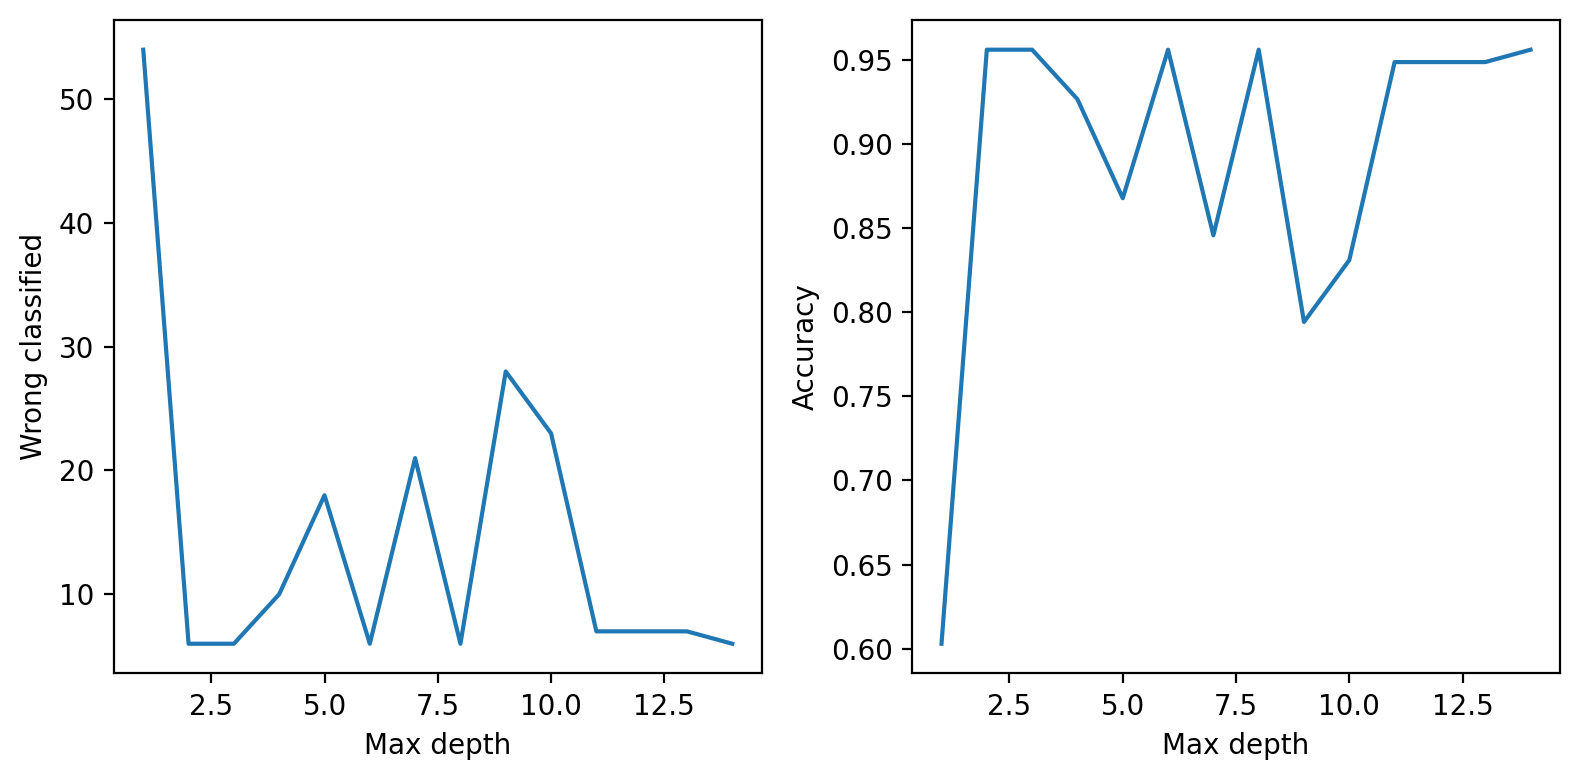

In [41]:
max_depth = np.arange(1, 15, 1)
wrong_results = []
accuracies = []

for depth in max_depth:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))
    
plot_tree_accuracy(max_depth, accuracies, wrong_results, "Max depth")

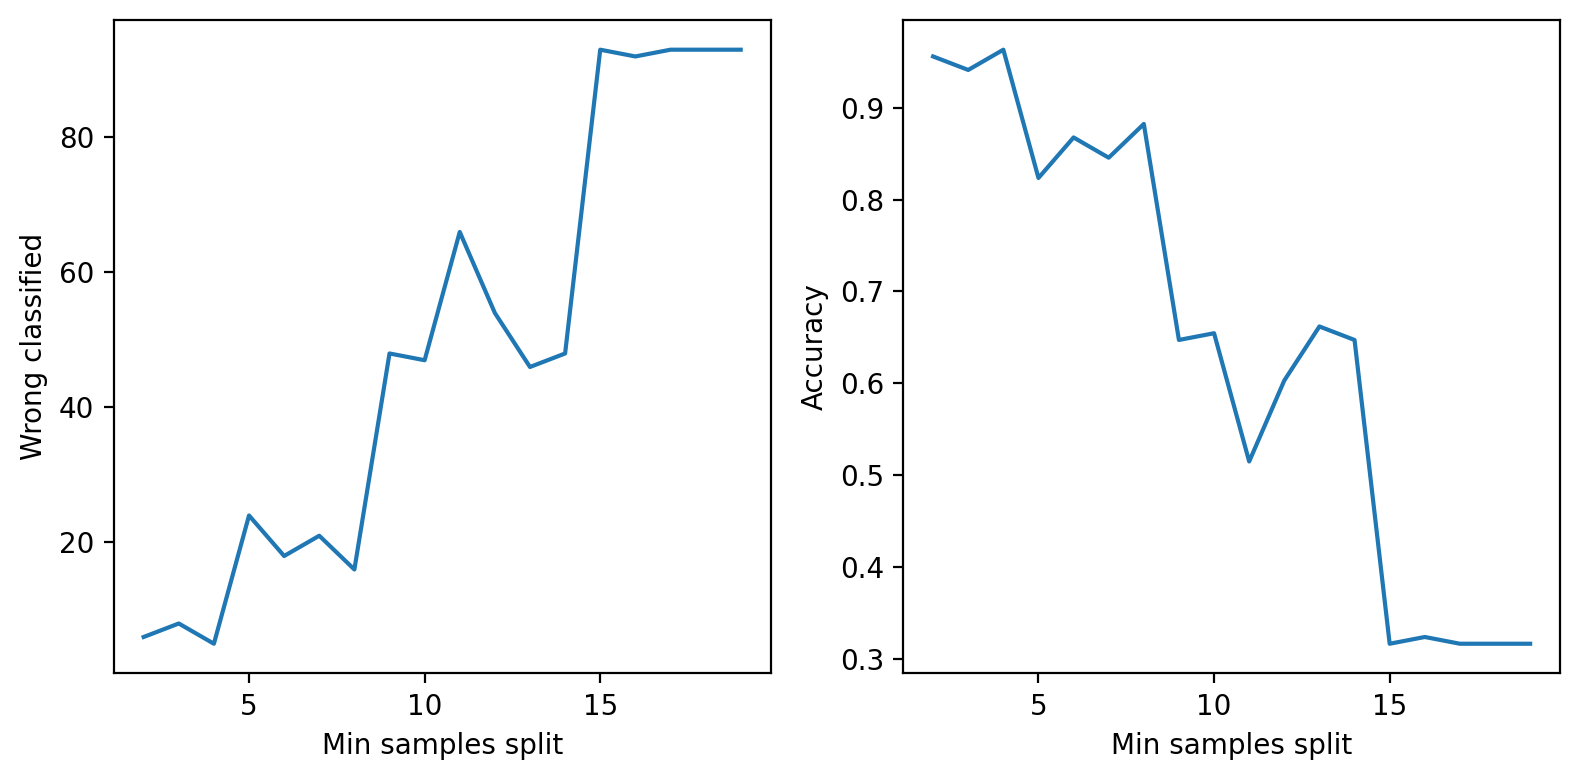

In [45]:
min_samples_split = np.arange(2, 20, 1)
wrong_results = []
accuracies = []

for split in min_samples_split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    clf = tree.DecisionTreeClassifier(min_samples_split=split)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))
    
plot_tree_accuracy(min_samples_split, accuracies, wrong_results, "Min samples split")

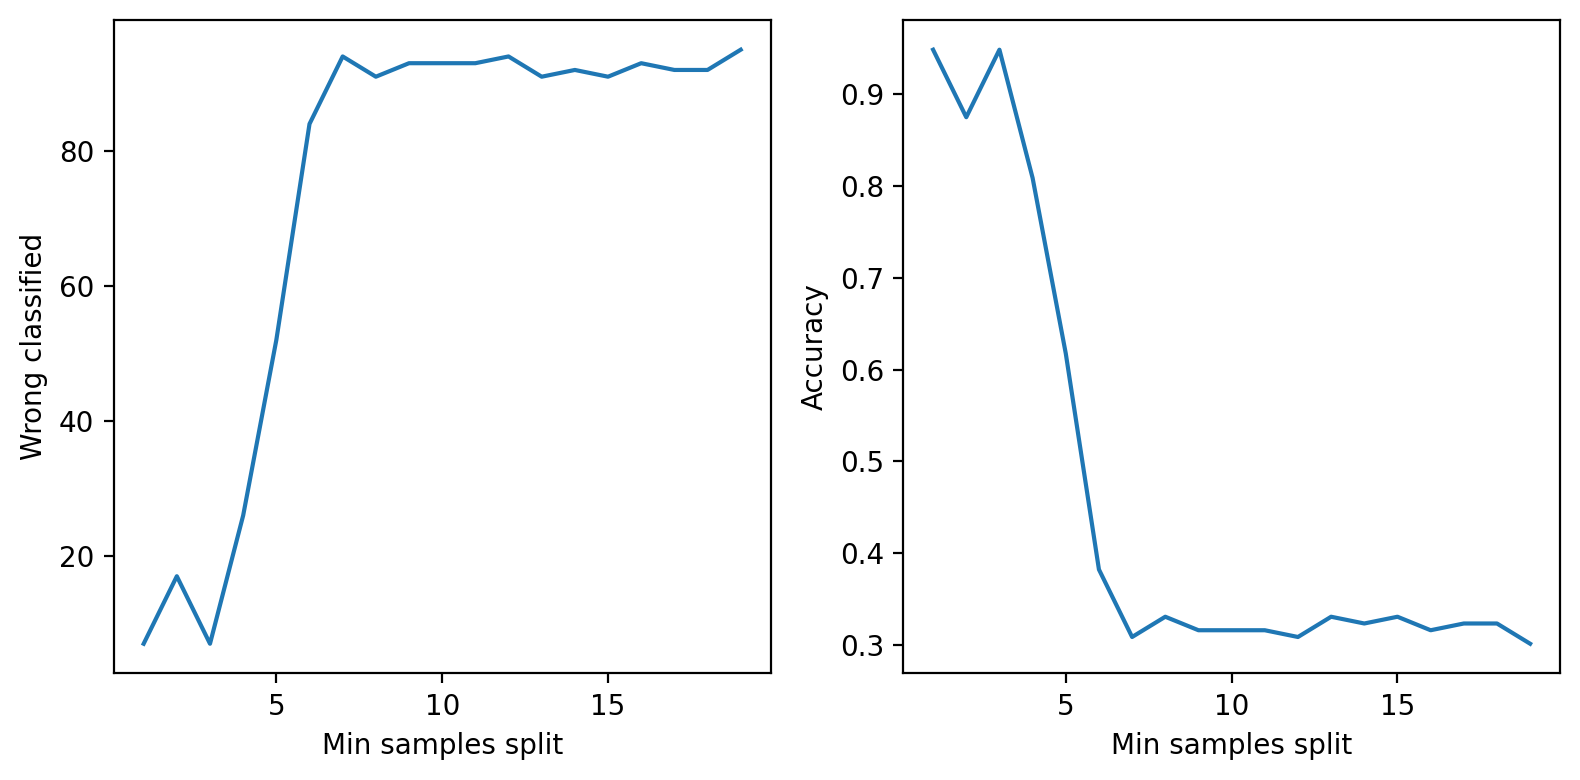

In [47]:
min_samples_leaf = np.arange(1, 20, 1)
wrong_results = []
accuracies = []

for leaf in min_samples_leaf:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    clf = tree.DecisionTreeClassifier(min_samples_leaf=leaf)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))
    
plot_tree_accuracy(min_samples_leaf, accuracies, wrong_results, "Min samples split")